### EDA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_excel("..\\src\\insurance\\data\\raw\\premiums.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns = df.columns.str.replace(" ", "_").str.lower()

In [5]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

### Handling NA values

In [6]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Outliers handling

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49976 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    49976 non-null  int64 
 1   gender                 49976 non-null  object
 2   region                 49976 non-null  object
 3   marital_status         49976 non-null  object
 4   number_of_dependants   49976 non-null  int64 
 5   bmi_category           49976 non-null  object
 6   smoking_status         49976 non-null  object
 7   employment_status      49976 non-null  object
 8   income_level           49976 non-null  object
 9   income_lakhs           49976 non-null  int64 
 10  medical_history        49976 non-null  object
 11  insurance_plan         49976 non-null  object
 12  annual_premium_amount  49976 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.3+ MB


In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [11]:
df[df["number_of_dependants"] < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40L,54,No Disease,Gold,13601
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10L,3,Diabetes,Bronze,14422
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Self-Employed,10L - 25L,21,Thyroid,Bronze,10141
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes & Thyroid,Silver,21816


In [12]:
#adding absolute value as "-" in the data is a simple error of data collecting process
df["number_of_dependants"] = abs(df["number_of_dependants"])


In [13]:
df[df["number_of_dependants"] < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount


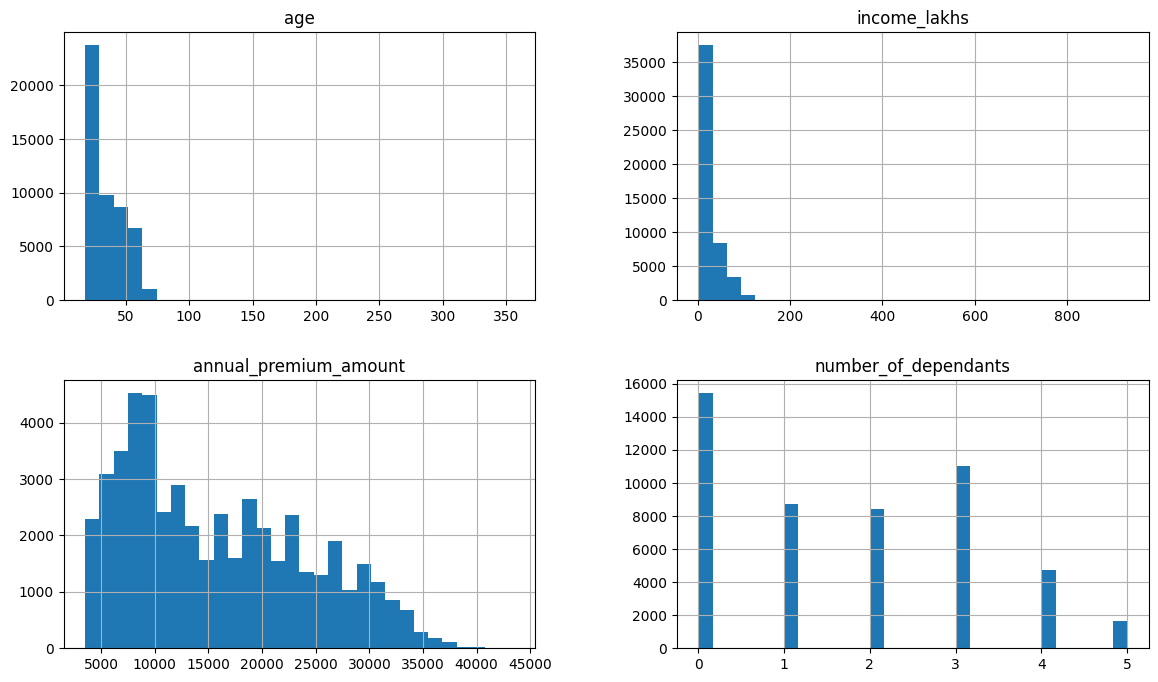

In [14]:
numeric_columns = ['age','income_lakhs','annual_premium_amount', 'number_of_dependants']
#df.select_dtypes(['float64', 'int64']).columns

df[numeric_columns].hist(bins=30, figsize=(14,8))
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


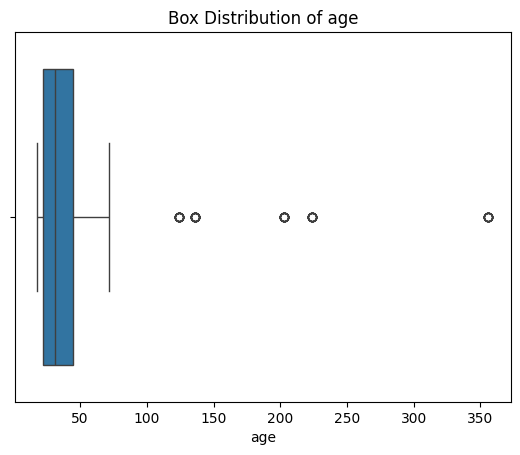

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


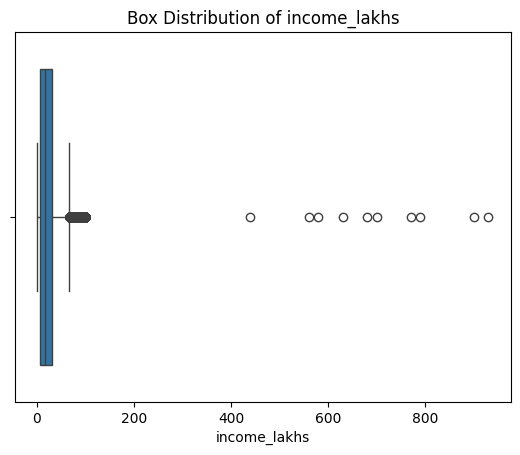

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


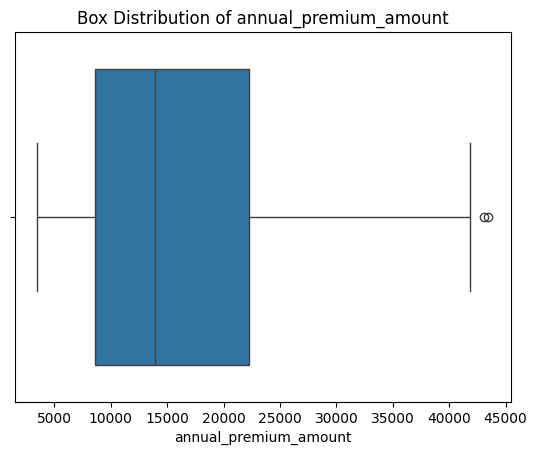

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


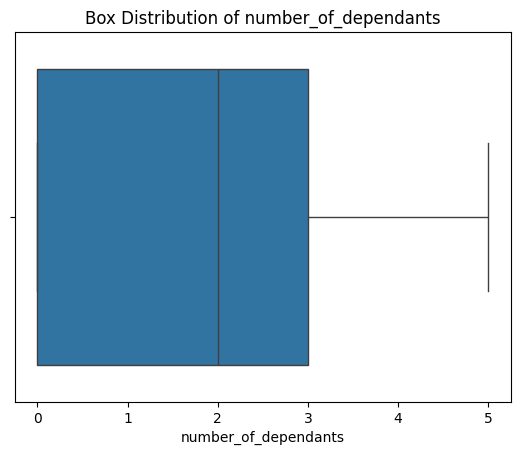

In [15]:

for num_col in numeric_columns:
    sns.boxplot(x=df[num_col])
    plt.title(f"Box Distribution of {num_col}")
    plt.show()

#### Age Column Outliers handling

In [16]:
df[df["age"] >= 100].head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
114,224,Male,Northeast,Married,3,Normal,Regular,Salaried,25L - 40L,26,No Disease,Gold,27523
786,124,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,46,No Disease,Silver,11752
1298,124,Female,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,5311
1456,124,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,<10L,2,Diabetes,Bronze,10238
1470,136,Male,Southeast,Married,3,Overweight,Regular,Self-Employed,10L - 25L,15,High blood pressure,Gold,31913


In [17]:
def clean_age(val):
    '''
    Removes the first digit from age values with more than two digits.
    
    Parameters:
        val (int or str): Original age value.
    
    Returns:
        int: Cleaned age with the first digit removed if length > 2, 
             otherwise returns the original value.
    '''
    val_str = str(val)
    if len(val_str) > 2:
        return int(val_str[1:])
    return val

df["age"] = df["age"].apply(clean_age)


In [18]:
df = df[df["age"] >= 18]

In [19]:
df[df["age"] >= 100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount


In [20]:
df["age"].describe()

count    49963.000000
mean        34.401837
std         13.680200
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

#### Income Column Outliers handling

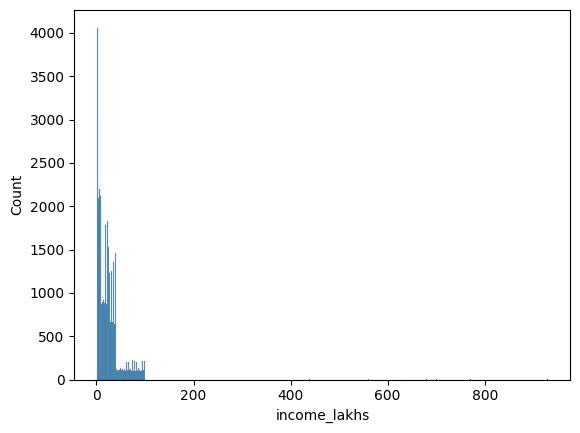

In [21]:
sns.histplot(df["income_lakhs"])
plt.show()

In [22]:
def get_salary_bounds(col):
    '''
    Calculates the lower and upper bounds for detecting outliers 
    using the IQR (Interquartile Range) method.

    Parameters:
        col (pd.Series): Numeric column (e.g., salary).

    Returns:
        tuple: (lower_bound, upper_bound) for outlier detection.'''
    Q1,Q3 = col.quantile([0.25,0.90])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return lower_bound,upper_bound

min_salary, max_salary = get_salary_bounds(df["income_lakhs"])
print(max_salary)

124.5


In [23]:
df[df["income_lakhs"] > max_salary]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
2635,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692
4220,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636
7775,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010
9021,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848
10337,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945
10639,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888
11456,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424
15437,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586
35446,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115
40970,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926


In [24]:
df = df[df["income_lakhs"] < max_salary]
print(df.shape)

(49953, 13)


In [25]:
df[df["income_lakhs"] > max_salary]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount


In [26]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49953.000000,49953.000000,49953.000000,49953.000000
mean,34.401577,1.717354,22.887895,15765.731227
std,13.680203,1.491906,22.168172,8419.531003
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.000000
max,72.000000,5.000000,100.000000,43471.000000


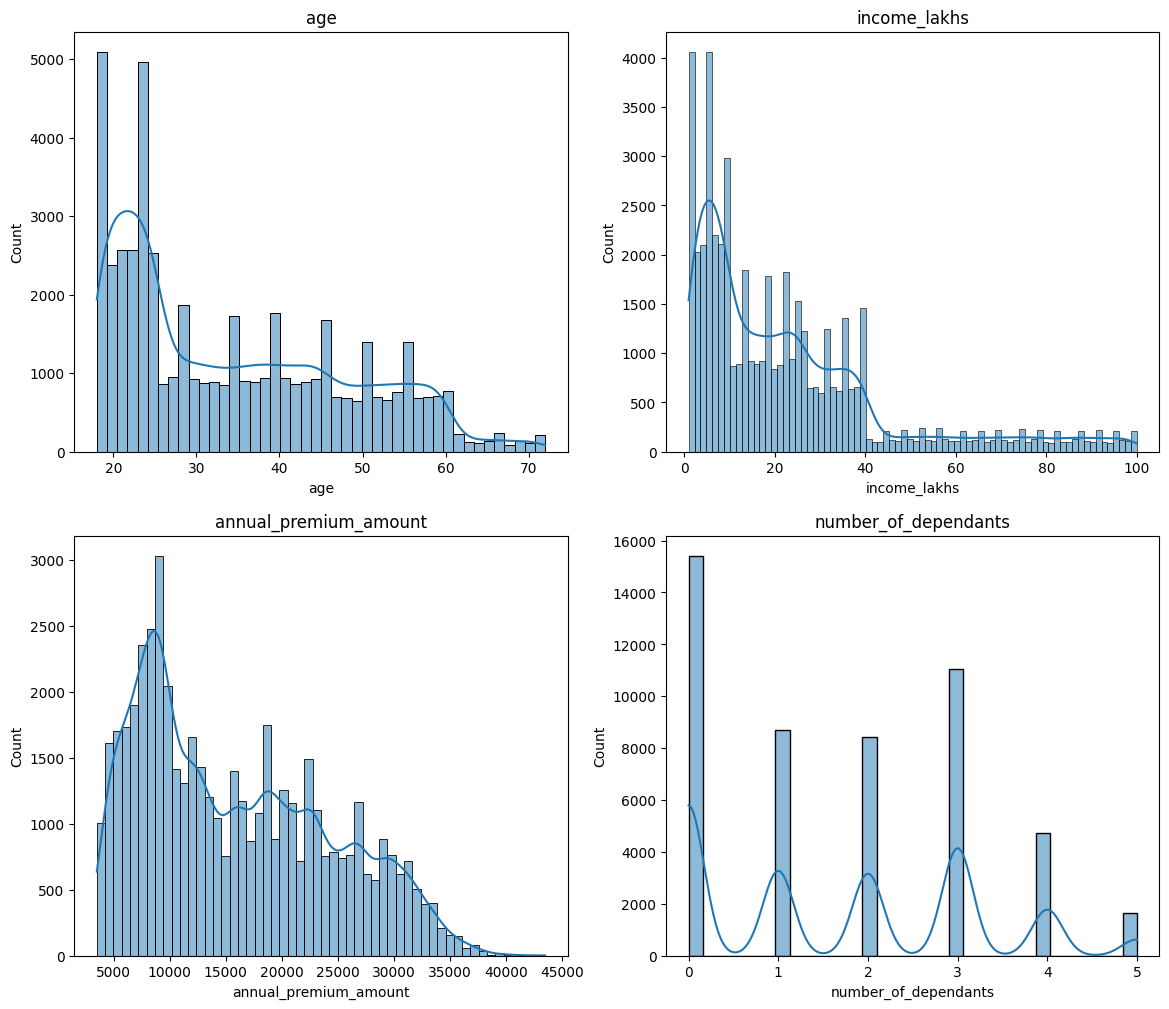

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
for i, col in enumerate(numeric_columns):
    ax = axs[i//2, i%2]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)

plt.show()

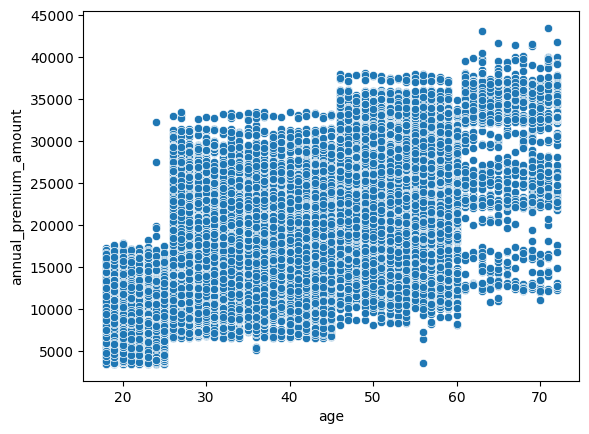

In [28]:
sns.scatterplot(df, x="age", y="annual_premium_amount")
plt.show()

### Categorical Columns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49953 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    49953 non-null  int64 
 1   gender                 49953 non-null  object
 2   region                 49953 non-null  object
 3   marital_status         49953 non-null  object
 4   number_of_dependants   49953 non-null  int64 
 5   bmi_category           49953 non-null  object
 6   smoking_status         49953 non-null  object
 7   employment_status      49953 non-null  object
 8   income_level           49953 non-null  object
 9   income_lakhs           49953 non-null  int64 
 10  medical_history        49953 non-null  object
 11  insurance_plan         49953 non-null  object
 12  annual_premium_amount  49953 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.3+ MB


In [30]:
categorical_columns = ['gender' , 'region' , 'marital_status', 'bmi_category', 'smoking_status',  'employment_status', 'income_level' ,'medical_history','insurance_plan']
for col in categorical_columns:
    print(col, ":", df[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [31]:
#taking care of redundant categories in smoking_status column
df.loc[:, "smoking_status"] = df["smoking_status"].replace({
    'Smoking=0': "No Smoking",
    'Does Not Smoke': "No Smoking",
    'Not Smoking': "No Smoking"
})
df["smoking_status"].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [32]:
pct_count_gender = df["gender"].value_counts(normalize=True)
pct_count_gender

gender
Male      0.549657
Female    0.450343
Name: proportion, dtype: float64

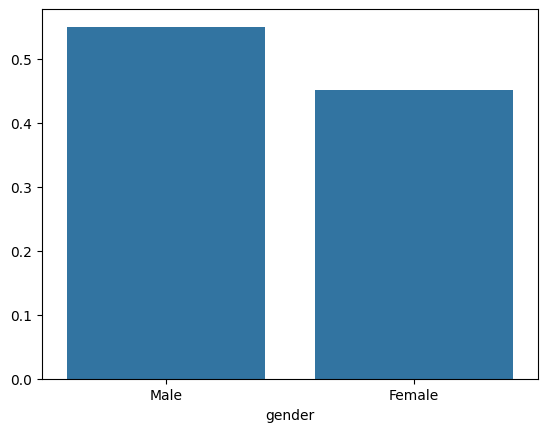

In [33]:
sns.barplot(x=pct_count_gender.index, y=pct_count_gender.values)
plt.show()

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


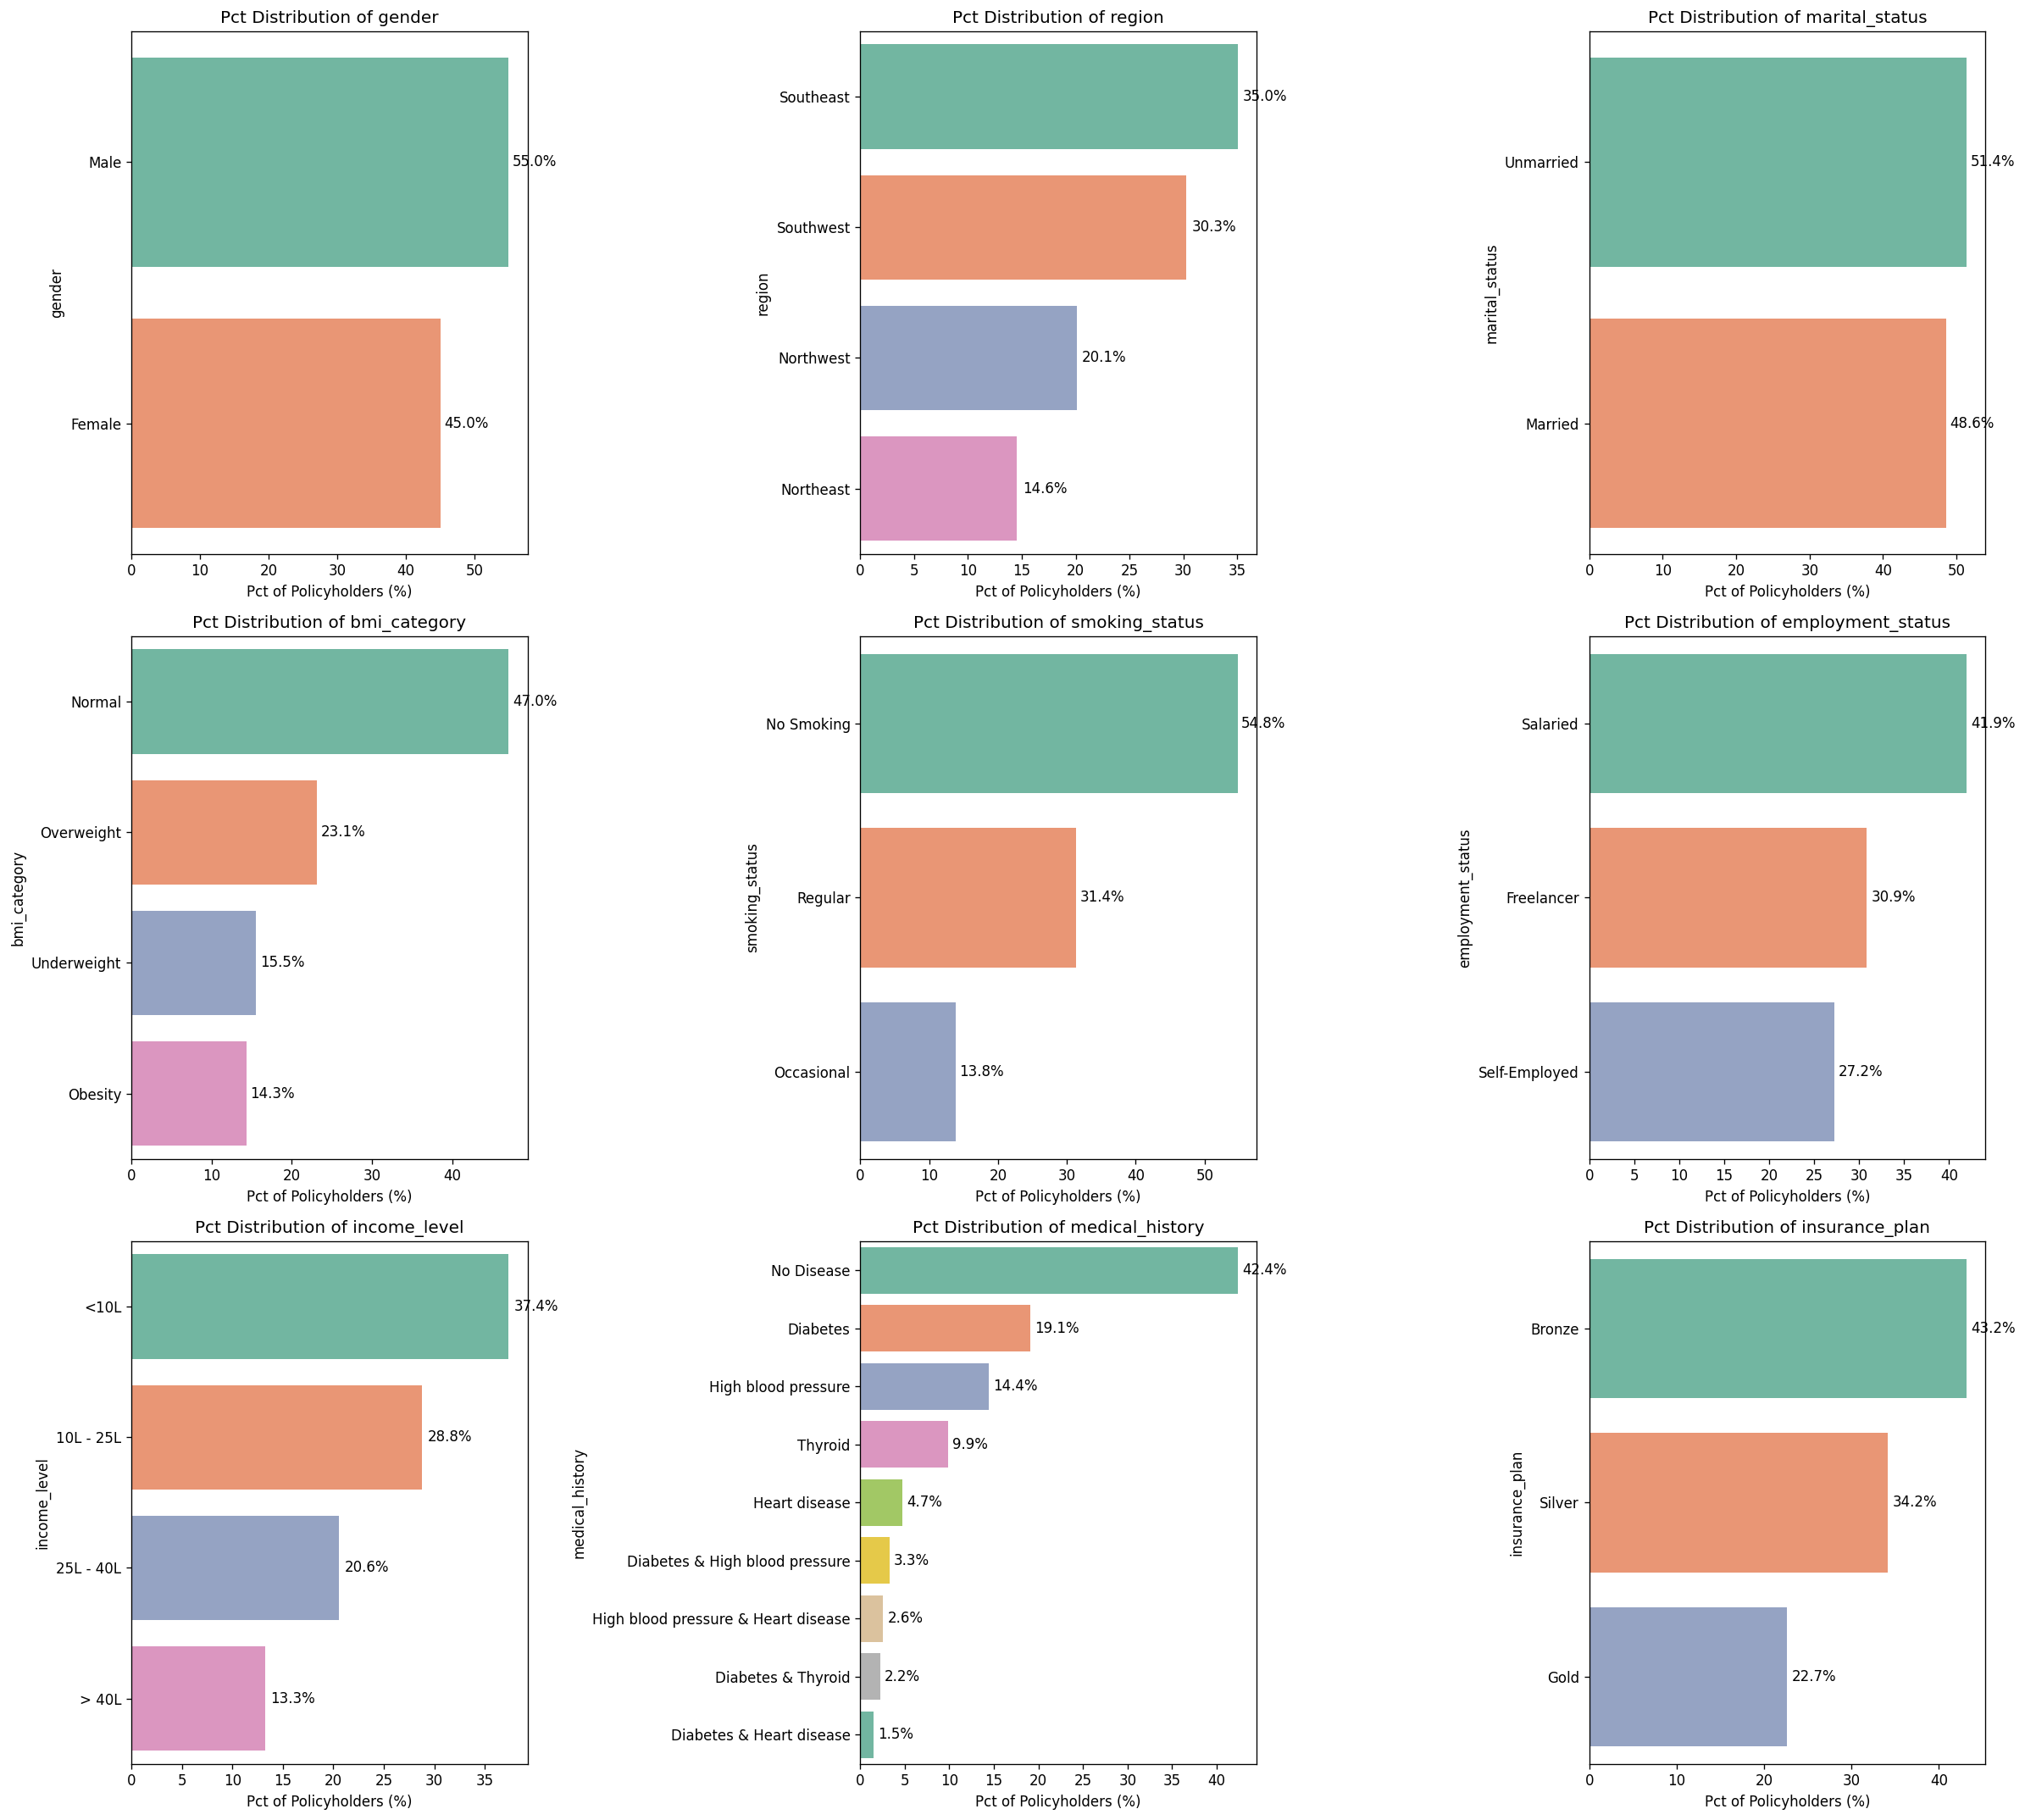

In [35]:

fig, axes = plt.subplots(3, 3, figsize=(20, 18), dpi=120)
axes = axes.flatten()

for ax, column in zip(axes, categorical_columns):
    category_counts = df[column].value_counts(normalize=True) * 100
    category_counts = category_counts.sort_values(ascending=False)
    
    sns.barplot(y=category_counts.index, x=category_counts.values, ax=ax, palette="Set2", orient='h', hue=category_counts.index, legend=False)
    
  
    for i, (val, name) in enumerate(zip(category_counts.values, category_counts.index)):
        ax.text(val + 0.5, i, f"{val:.1f}%", va='center')

    ax.set_title(f"Pct Distribution of {column}")
    ax.set_xlabel("Pct of Policyholders (%)")
    ax.set_ylabel(column)

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5312  3885    5187
25L - 40L         3686  2843    3753
<10L             12237   931    5491
> 40L              329  3657    2642


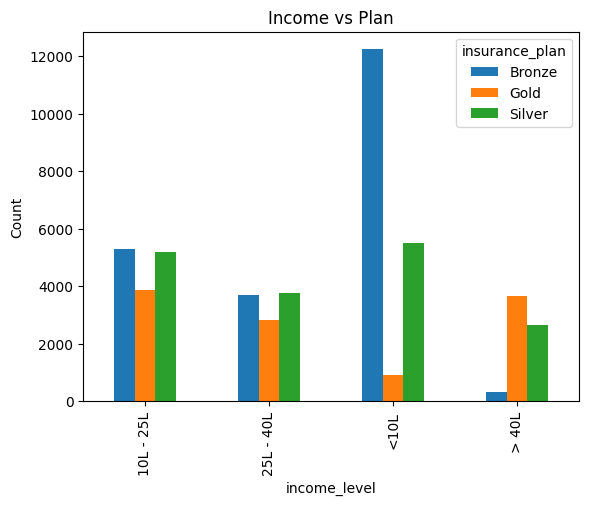

In [36]:
crosstab = pd.crosstab(df["income_level"], df["insurance_plan"])
print(crosstab)

crosstab.plot(kind='bar')
plt.title("Income vs Plan")
plt.ylabel("Count")
plt.show()

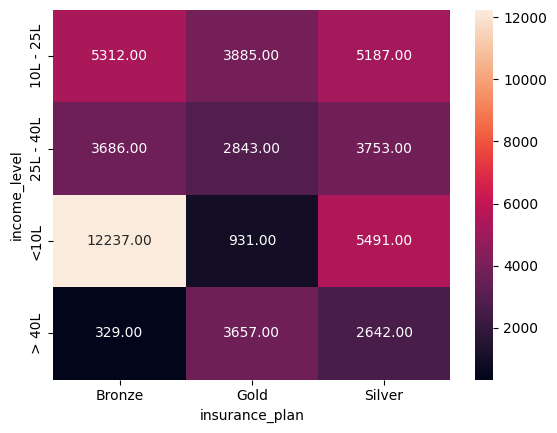

In [37]:
sns.heatmap(crosstab, annot=True, fmt='.2f')
plt.show()